In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Importing Data Sets

## data.csv

In [16]:
data = pd.read_csv('data.csv')
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


# Cleaning Data

In [34]:
# dropping the Nan from the column year to clean the data set up
data = data.dropna(subset = ["year"])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [35]:
 #setting the start and end dates for scaling the data set for songs BEFORE the 21st century
start_date = 0
end_date = 2000

after_start_date = data["year"] >= start_date
before_end_date = data["year"] <= end_date
between_two_dates = after_start_date & before_end_date
before_twentyfirst_century = data.loc[between_two_dates]

before_twentyfirst_century.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130253 entries, 0 to 167908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      130253 non-null  float64
 1   artists           130253 non-null  object 
 2   danceability      130253 non-null  float64
 3   duration_ms       130253 non-null  int64  
 4   energy            130253 non-null  float64
 5   explicit          130253 non-null  int64  
 6   id                130253 non-null  object 
 7   instrumentalness  130253 non-null  float64
 8   key               130253 non-null  int64  
 9   liveness          130253 non-null  float64
 10  loudness          130253 non-null  float64
 11  mode              130253 non-null  int64  
 12  name              130253 non-null  object 
 13  popularity        130253 non-null  int64  
 14  release_date      130253 non-null  object 
 15  speechiness       130253 non-null  float64
 16  tempo             13

In [36]:
 #setting the start and end dates for scaling the data set for songs AFTER the 21st century
start_date = 2000
end_date = 2020

after_start_date = data["year"] >= start_date
before_end_date = data["year"] <= end_date
between_two_dates = after_start_date & before_end_date
after_twentyfirst_century = data.loc[between_two_dates]

after_twentyfirst_century.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41656 entries, 6054 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      41656 non-null  float64
 1   artists           41656 non-null  object 
 2   danceability      41656 non-null  float64
 3   duration_ms       41656 non-null  int64  
 4   energy            41656 non-null  float64
 5   explicit          41656 non-null  int64  
 6   id                41656 non-null  object 
 7   instrumentalness  41656 non-null  float64
 8   key               41656 non-null  int64  
 9   liveness          41656 non-null  float64
 10  loudness          41656 non-null  float64
 11  mode              41656 non-null  int64  
 12  name              41656 non-null  object 
 13  popularity        41656 non-null  int64  
 14  release_date      41656 non-null  object 
 15  speechiness       41656 non-null  float64
 16  tempo             41656 non-null  fl

In [50]:
# create a list of our conditions
conditions = [
    (data['year'] <= 2000),
    (data['year'] >= 2001)
    ]

# create a list of the values we want to assign for each condition
values = ['before_21st_century', 'after_21st_century']

# create a new column and use np.select to assign values to it using our lists as arguments
data['years_split'] = np.select(conditions, values)

# display updated DataFrame
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,years_split
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,before_21st_century
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,before_21st_century
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,before_21st_century
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,before_21st_century
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,before_21st_century


In [ ]:
# create a list of our conditions
conditions = [
    (data['year'] <= 2000),
    (data['year'] >= 2001)
    ]

# create a list of the values we want to assign for each condition
values = ['before_21st_century', 'after_21st_century']

# create a new column and use np.select to assign values to it using our lists as arguments
data['years_split'] = np.select(conditions, values)

# display updated DataFrame
data.head()

# Plotting Data

## All years

Text(0, 0.5, 'count')

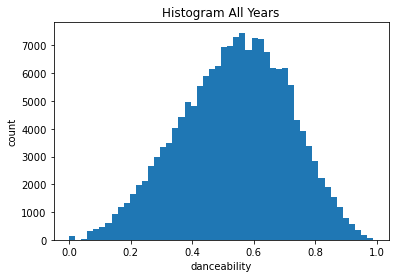

In [65]:
plt.hist(data['danceability'], bins=50)
plt.title('Histogram All Years')
plt.xlabel('danceability')
plt.ylabel('count')

## Before 21st Century

Text(0, 0.5, 'count')

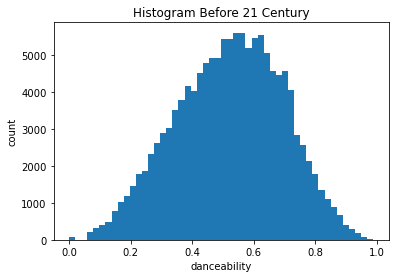

In [63]:
plt.hist(before_twentyfirst_century['danceability'], bins=50)
plt.title('Histogram Before 21 Century')
plt.xlabel('danceability')
plt.ylabel('count')

## After 21st Century

Text(0, 0.5, 'count')

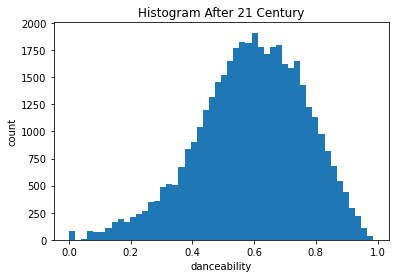

In [64]:
plt.hist(after_twentyfirst_century['danceability'], bins=50)
plt.title('Histogram After 21 Century')
plt.xlabel('danceability')
plt.ylabel('count')

Text(0, 0.5, 'count')

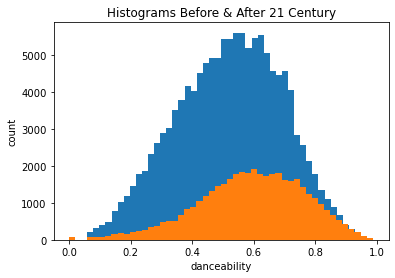

In [61]:
plt.hist(before_twentyfirst_century['danceability'], bins=50)
plt.hist(after_twentyfirst_century['danceability'], bins=50)
plt.title('Histograms Before & After 21 Century')
plt.xlabel('danceability')
plt.ylabel('count')